In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('network_backup_dataset.csv', sep=',')

data = df.replace({'Day of Week': {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4,
                                   'Saturday': 5, 'Sunday': 6},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22, 'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 
                                'File_27': 27,'File_28': 28, 'File_29': 29, }})

def print_RMSEs_plot(features,targets,model):
    predicted = cross_val_predict(model, features, targets, cv=10)
    cv_scores = cross_validate(model, features, targets, cv=10, scoring='neg_mean_squared_error',return_train_score=True)

    Test_RMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
    Train_RMSE=(sum(cv_scores['train_score'])/-10.0)**0.5

    print ("Test RMSE with cross validation: %0.7f"%Test_RMSE )
    print ("Train RMSE with cross validation: %0.7f"%Train_RMSE)

    print('')
    print("Fitted values vs. true values ")
    plt.figure(figsize=(12,4))
    plt.scatter(range(0,len(targets)), targets, s=1,label='true vlaues')
    plt.scatter(range(0,len(targets)), predicted,s=1, label='fitted values') 
#    plt.ylim(0,0.4)
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('fitted values and true values')
    plt.show()

    #Residual
    print(" residuals vs. ﬁtted values ")
    y_residual =targets-predicted
    plt.figure(figsize=(12,4))
    plt.scatter(range(0,len(targets)), predicted,s=1, label='fitted values')
    plt.scatter(range(0,len(targets)), y_residual,s=1, label='residuals')
#    plt.ylim(0,0.4)
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Residual values and fitted values')
    plt.show()
    
    return Test_RMSE,Train_RMSE

linear_regression = linear_model.LinearRegression()

workflow_ID 0
Test RMSE with cross validation: 0.0358870
Train RMSE with cross validation: 0.0358355

Fitted values vs. true values 


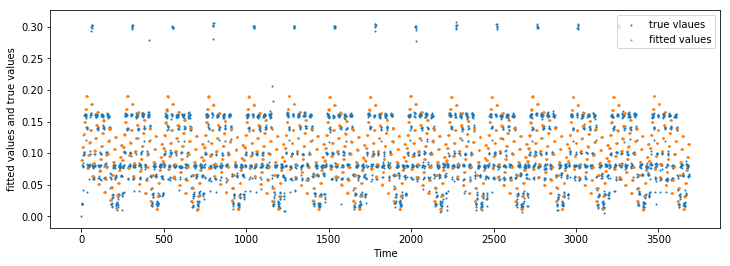

 residuals vs. ﬁtted values 


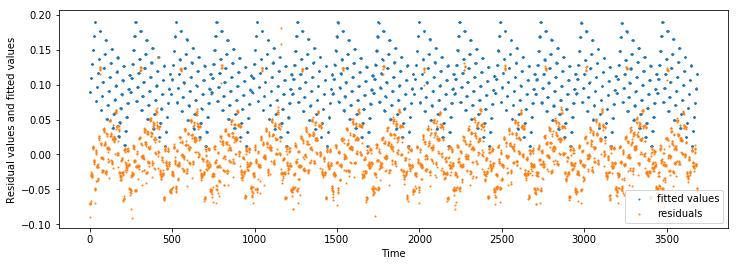

workflow_ID 1
Test RMSE with cross validation: 0.1489186
Train RMSE with cross validation: 0.1487660

Fitted values vs. true values 


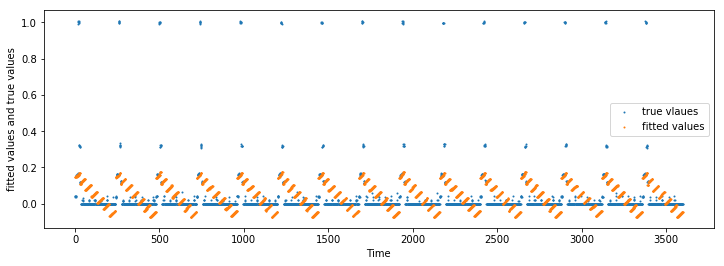

 residuals vs. ﬁtted values 


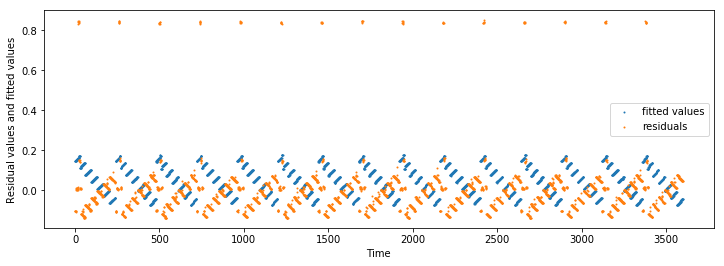

workflow_ID 2
Test RMSE with cross validation: 0.0430669
Train RMSE with cross validation: 0.0429093

Fitted values vs. true values 


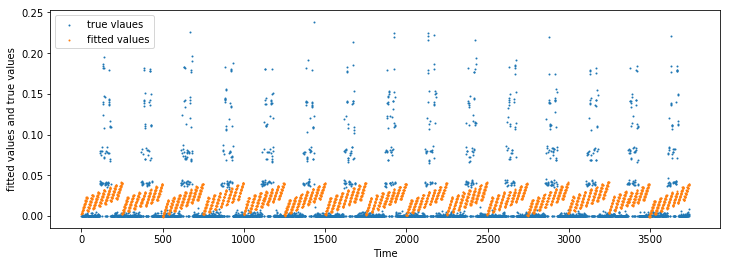

 residuals vs. ﬁtted values 


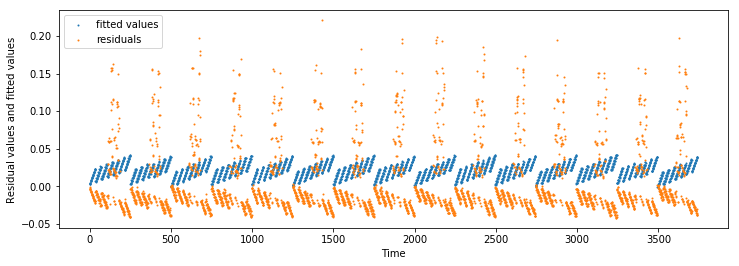

workflow_ID 3
Test RMSE with cross validation: 0.0072609
Train RMSE with cross validation: 0.0072439

Fitted values vs. true values 


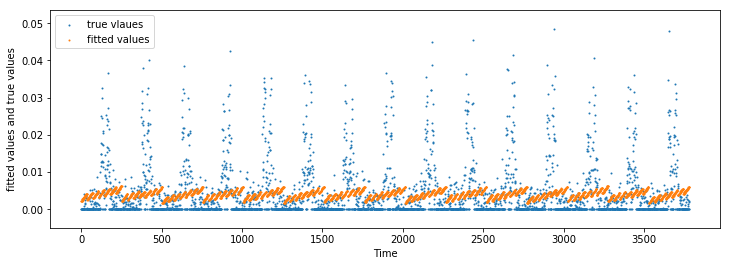

 residuals vs. ﬁtted values 


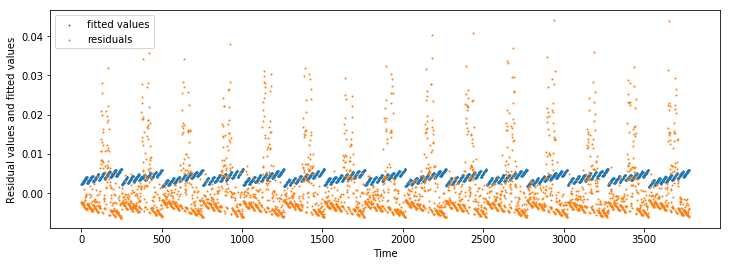

workflow_ID 4
Test RMSE with cross validation: 0.0859906
Train RMSE with cross validation: 0.0859219

Fitted values vs. true values 


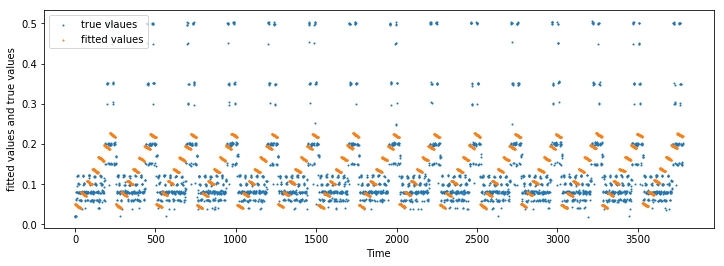

 residuals vs. ﬁtted values 


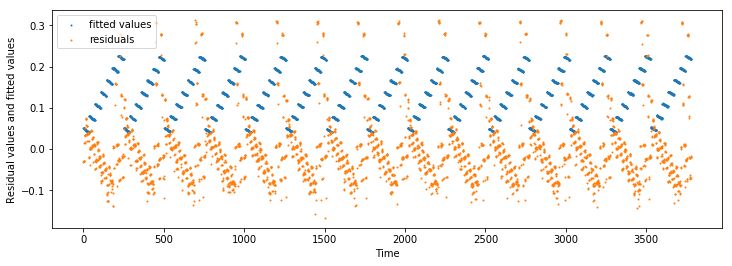

In [2]:
data1=data
data1= data1.groupby('Work-Flow-ID')
for workflow_ID, group in data1:
    print("workflow_ID %d"% workflow_ID)
    X_temp=group[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 
        'Work-Flow-ID','File Name']]
    y_temp=group['Size of Backup (GB)']
    print_RMSEs_plot(X_temp,y_temp,linear_regression)


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model, metrics
from sklearn.pipeline import make_pipeline

In [4]:
def Get_RMSEs(features,targets,model):
    cv_scores = cross_validate(model, features, targets, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
    Test_RMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
    Train_RMSE=(sum(cv_scores['train_score'])/-10.0)**0.5

    return Test_RMSE,Train_RMSE


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model, metrics
from sklearn.pipeline import make_pipeline

Average_TestError=[]
Average_TrainError=[]

data2=data
for i in range(2,11):

    TempTestError=[]
    TempTrainError=[]
    poly = PolynomialFeatures(degree=i)
    print("calculating degree %d ..." %i)
    data3= data2.groupby('Work-Flow-ID')
    for workflow_ID, group in data3:
        print("workflow_ID %d"% workflow_ID)
        X_temp=group[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 
            'Work-Flow-ID','File Name']]
        y_temp=group['Size of Backup (GB)']

        X_new=poly.fit_transform(X_temp,y_temp)
        temp_Test_RMSE,temp_Train_RMSE=Get_RMSEs(X_new,y_temp,linear_regression)
        TempTestError.append(temp_Test_RMSE)
        TempTrainError.append(temp_Train_RMSE)
        
    Average_TestError.append(np.mean(TempTestError))
    Average_TrainError.append(np.mean(TempTrainError))

calculating degree 2 ...
workflow_ID 0
workflow_ID 1
workflow_ID 2
workflow_ID 3
workflow_ID 4
calculating degree 3 ...
workflow_ID 0
workflow_ID 1
workflow_ID 2
workflow_ID 3
workflow_ID 4
calculating degree 4 ...
workflow_ID 0
workflow_ID 1
workflow_ID 2
workflow_ID 3
workflow_ID 4
calculating degree 5 ...
workflow_ID 0
workflow_ID 1
workflow_ID 2
workflow_ID 3
workflow_ID 4
calculating degree 6 ...
workflow_ID 0
workflow_ID 1
workflow_ID 2
workflow_ID 3
workflow_ID 4
calculating degree 7 ...
workflow_ID 0
workflow_ID 1
workflow_ID 2
workflow_ID 3
workflow_ID 4
calculating degree 8 ...
workflow_ID 0
workflow_ID 1
workflow_ID 2
workflow_ID 3
workflow_ID 4
calculating degree 9 ...
workflow_ID 0
workflow_ID 1
workflow_ID 2
workflow_ID 3
workflow_ID 4
calculating degree 10 ...
workflow_ID 0
workflow_ID 1
workflow_ID 2
workflow_ID 3
workflow_ID 4


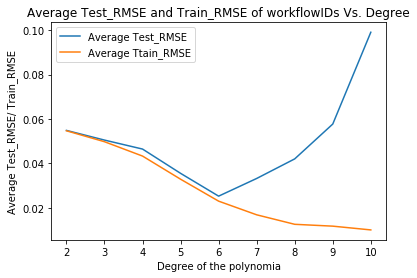

In [6]:
plt.plot(range(2,11),Average_TestError, label='Average Test_RMSE')
plt.plot(range(2,11),Average_TrainError, label='Average Ttain_RMSE')
plt.legend(loc='best')
plt.title("Average Test_RMSE and Train_RMSE of workflowIDs Vs. Degree")
plt.xlabel('Degree of the polynomia')
plt.ylabel('Average Test_RMSE/ Train_RMSE')
plt.show()

In [7]:
# best degree is 6 from plot

for degree equals to 6:
workflow_ID 0
Test RMSE with cross validation: 0.0128652
Train RMSE with cross validation: 0.0103765

Fitted values vs. true values 


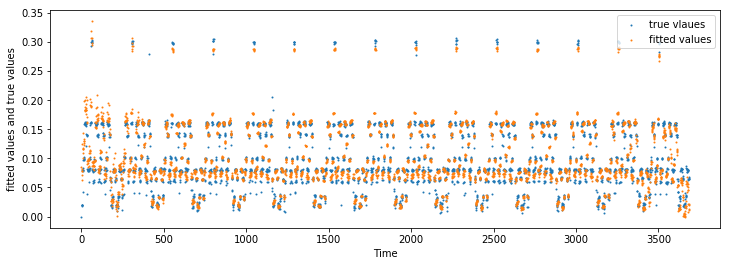

 residuals vs. ﬁtted values 


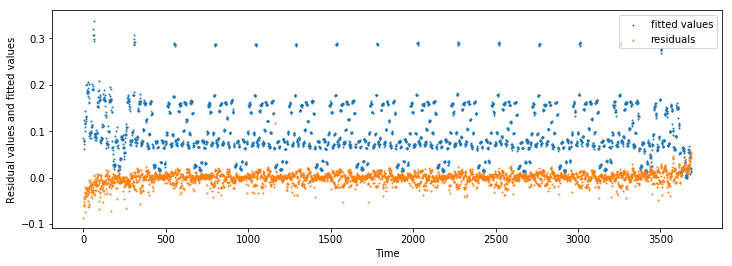

workflow_ID 1
Test RMSE with cross validation: 0.0430033
Train RMSE with cross validation: 0.0424840

Fitted values vs. true values 


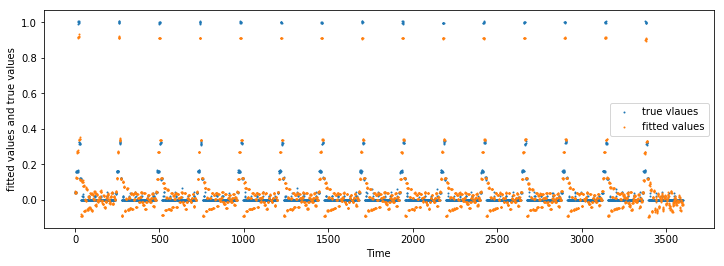

 residuals vs. ﬁtted values 


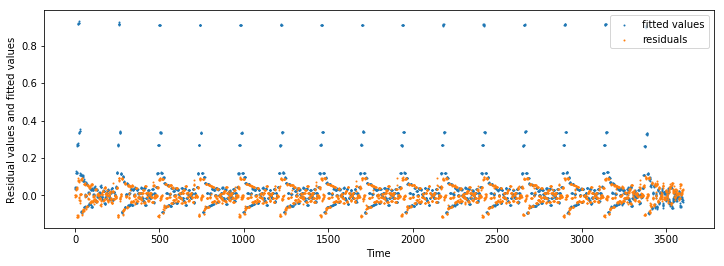

workflow_ID 2
Test RMSE with cross validation: 0.0273099
Train RMSE with cross validation: 0.0218344

Fitted values vs. true values 


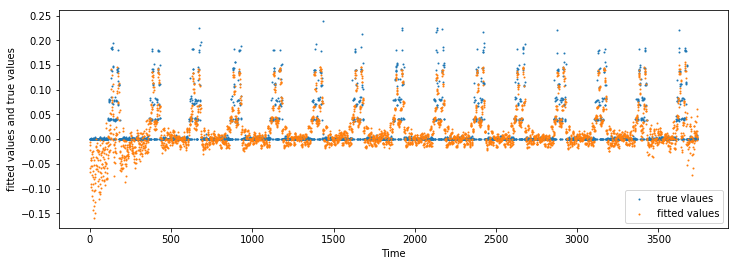

 residuals vs. ﬁtted values 


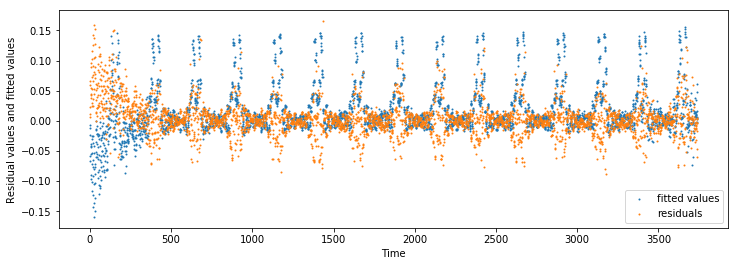

workflow_ID 3
Test RMSE with cross validation: 0.0053473
Train RMSE with cross validation: 0.0045945

Fitted values vs. true values 


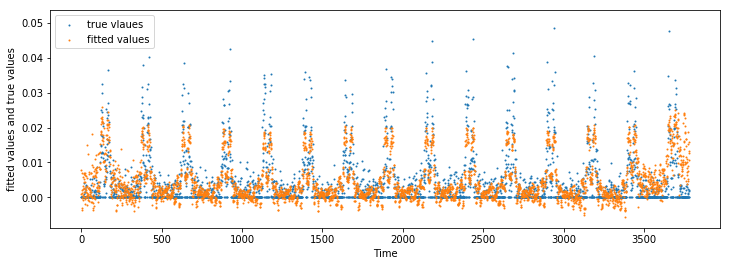

 residuals vs. ﬁtted values 


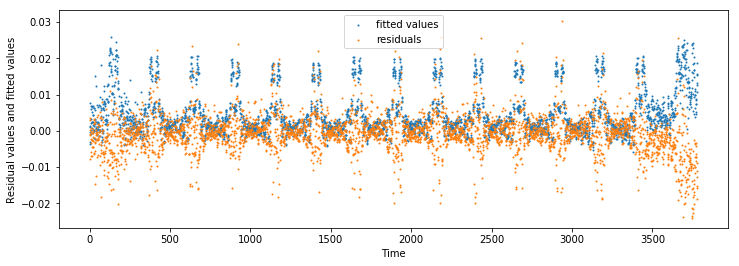

workflow_ID 4
Test RMSE with cross validation: 0.0375325
Train RMSE with cross validation: 0.0354736

Fitted values vs. true values 


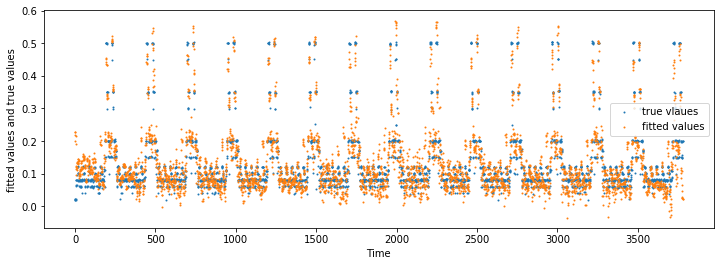

 residuals vs. ﬁtted values 


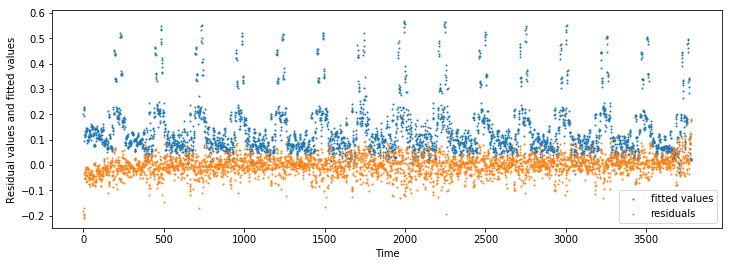

In [8]:
print("for degree equals to 6:")
data4=data
data4= data4.groupby('Work-Flow-ID')
poly = PolynomialFeatures(degree=6)
for workflow_ID, group in data4:
    print("workflow_ID %d"% workflow_ID)
    X_temp=group[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 
        'Work-Flow-ID','File Name']]
    y_temp=group['Size of Backup (GB)']
    X_new=poly.fit_transform(X_temp,y_temp)
    print_RMSEs_plot(X_new,y_temp,linear_regression)
